<center><img src="https://media-exp1.licdn.com/dms/image/C4E22AQEbIXZiRVkJPQ/feedshare-shrink_2048_1536/0?e=1608768000&v=beta&t=2xuCh9kIGEeB_dLvnbLm9tAOzMU3dAvyssm5tbazr7c" width="1000"></center>

# Programa de Especialización en Python

## Caso: Random Forest con H2O

### Prof. Manuel Sigüeñas, M.Sc.(c)
[msguenas@socialdata-peru.com](msguenas@socialdata-peru.com)

In [1]:
import h2o
from h2o.estimators import H2ORandomForestEstimator

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.231-b11, mixed mode)
  Starting server from C:\ProgramData\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\SOCIAL~1\AppData\Local\Temp\tmp17ug2bku
  JVM stdout: C:\Users\SOCIAL~1\AppData\Local\Temp\tmp17ug2bku\h2o_SOCIAL_DATA_started_from_python.out
  JVM stderr: C:\Users\SOCIAL~1\AppData\Local\Temp\tmp17ug2bku\h2o_SOCIAL_DATA_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Bogota
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.1
H2O_cluster_version_age:,6 months and 7 days !!!
H2O_cluster_name:,H2O_from_python_SOCIAL_DATA_ezeds2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.526 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"accepting new members, healthy"


In [3]:
import pandas as pd
FileCSV='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
dataCSV=pd.read_csv(FileCSV, header=None)
dataCSV.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataCSV.columns=['c1','c2','c3','c4','c5']

In [6]:
dataCSV.head()

,c1,c2,c3,c4,c5
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
dataCSV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   c1      150 non-null    float64
 1   c2      150 non-null    float64
 2   c3      150 non-null    float64
 3   c4      150 non-null    float64
 4   c5      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
dataCSV.groupby("c5").c5.count()

c5
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: c5, dtype: int64

In [19]:
dataCSV["c5"]=dataCSV["c5"].replace("Iris-setosa","setosa")
dataCSV["c5"]=dataCSV["c5"].replace("Iris-versicolor","versicolor")
dataCSV["c5"]=dataCSV["c5"].replace("Iris-virginica","virginica")

In [20]:
data=h2o.H2OFrame(dataCSV)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [21]:
data.col_names

['c1', 'c2', 'c3', 'c4', 'c5']

In [22]:
# predictores del modelo
training_columns = ['c1', 'c2', 'c3', 'c4']
# target del modelo
response_column = 'c5'

In [13]:
# Construcción de datos de entrenamiento y prueba
train, test = data.split_frame(ratios=[0.8],seed=2020)

In [23]:
# definición del modelo
model = H2ORandomForestEstimator(ntrees=50, # número de árboles
                                 max_depth=2, #máxima profundidad
                                 seed=0,
                                 nfolds=10) #muestras de validavión

In [15]:
# modelo de entranamiento
model.train(x=training_columns, #etiquetas de los predictores
            y=response_column, #etiqueta del target
            training_frame=train) #datos de entrenamiento

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [16]:
performance = model.model_performance(train)
performance


ModelMetricsMultinomial: drf
** Reported on test data. **

MSE: 0.02575206745387155
RMSE: 0.1604745071775313
LogLoss: 0.11435681031551473
Mean Per-Class Error: 0.03954175905395418

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,setosa,versicolor,virginica,Error,Rate
0,40.0,0.0,0.0,0.000000,0 / 40
1,0.0,38.0,3.0,0.073171,3 / 41
2,0.0,2.0,42.0,0.045455,2 / 44
3,40.0,40.0,45.0,0.040000,5 / 125



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,0.96
1,2,1.00
2,3,1.00


In [26]:
#performance.plot(type="roc")

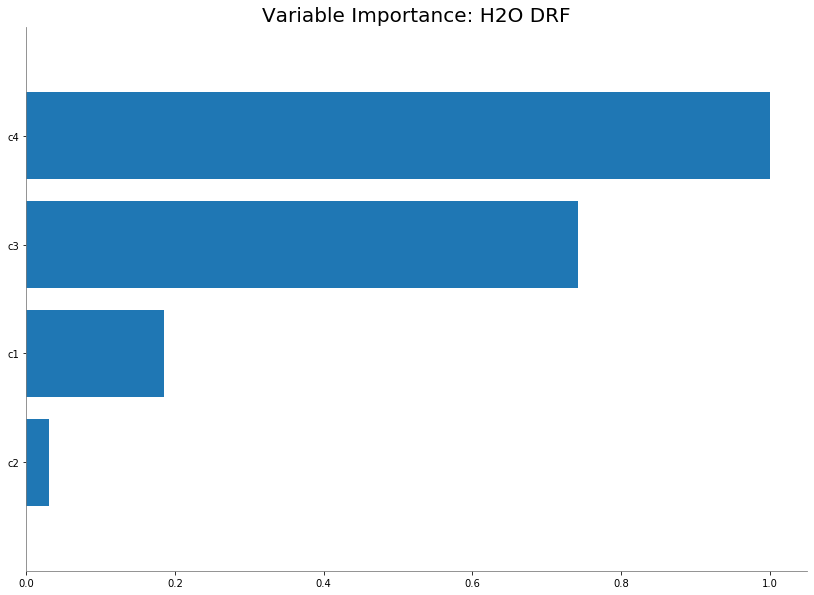

In [17]:
model.varimp_plot()

In [18]:
# Performance del modelo
performance2 = model.model_performance(test_data=test)

print(performance2)


ModelMetricsMultinomial: drf
** Reported on test data. **

MSE: 0.014595283523771605
RMSE: 0.12081094124197363
LogLoss: 0.07639770701996741
Mean Per-Class Error: 0.05555555555555555

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,setosa,versicolor,virginica,Error,Rate
0,10.0,0.0,0.0,0.000000,0 / 10
1,0.0,9.0,0.0,0.000000,0 / 9
2,0.0,1.0,5.0,0.166667,1 / 6
3,10.0,10.0,5.0,0.040000,1 / 25



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,0.96
1,2,1.00
2,3,1.00


## CASO PRACTICO

### DESCRIPCIÓN
Los datos están relacionados con campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente para acceder si el producto (depósito bancario a plazo) estaría ('sí') o no ('no') suscrito.

### Información del atributo:

### Variables de entrada:
   #### datos del cliente bancario:
   1 - age :edad del cliente (numérico)
   
   2 - job: tipo de trabajo (categórico: "administrador", "desconocido", "desempleado", "gerencia", "empleada doméstica", "empresario", "estudiante",
                                       "obrero", "autónomo", "jubilado", "técnico", "servicios")
                                       
   3 - marital: estado civil (categórico: "casado", "divorciado", "soltero"; nota: "divorciado" significa divorciado o viudo)
   
   4 - education :educacion del cliente (categórica: "desconocido", "secundario", "primario", "terciario")
   
   5 - default: incumplimiento del cliente ¿tiene crédito en incumplimiento? (binario: "sí", "no")
   
   6 - balance: saldo medio anual, en euros (numérico)
   
   7 - housing: tiene préstamo de vivienda? (binario: "sí", "no")
   
   8 - loan: tiene préstamo personal? (binario: "sí", "no")
   
   #### relacionado con el último contacto de la campaña actual:
   9 - contact: tipo de comunicación de contacto (categórico: "desconocido", "teléfono", "celular")
   
  10 day: último día de contacto del mes (numérico)
  
  11 month: último contacto del año del año (categórico: "ene", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: duración del último contacto, en segundos (numérico)
  
   #### otros atributos:
  13 - campaign: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto)
  
  14 pdays: número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior (numérico, -1 significa que el cliente no fue contactado previamente)
  
  15 - previous: número de contactos realizados antes de esta campaña y para este cliente (numérico)
  
  16 - poutcome: resultado de la campaña de marketing anterior (categórico: "desconocido", "otro", "fracaso", "éxito")

  ### Variable de salida (objetivo deseado):
  17 - y - ¿el cliente ha suscrito un depósito a plazo? (binario: "sí", "no")

**Fuente :**
    
[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

### Actividades

1. Dividir la data en 70% de entrenamiento y lo restante para la data de testeo.
2. Entrenar el modelo con los siguientes parametros 60 arboles,3 de profundidad y 8 folders para la validacion cruzada.
3. Encontrar el AUC del modelo de la validacion cruzada para los datos de entrenamiento.
4. Obtener el AUC del modelo con la data de testeo.

In [11]:
import h2o
from h2o.estimators import H2ORandomForestEstimator

In [14]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,11 mins 36 secs
H2O cluster timezone:,America/Bogota
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.4
H2O cluster version age:,16 days
H2O cluster name:,H2O_from_python_SOCIAL_DATA_0rgpt4
H2O cluster total nodes:,1
H2O cluster free memory:,3.127 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"locked, healthy"


In [46]:
import numpy as np
import pandas as pd
FileCSV="D:/SOCIAL DATA/Dropbox/Python 5ta edición - Programa Completo/3. avanzado/sesión_02/datos/bank-full.csv"
df_bank=pd.read_csv(FileCSV,sep=";")
data = h2o.import_file(FileCSV)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [47]:
data

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no
